 <font size="6">Raining Cats and Dogs in Australia tomorrow?!</font> 

For this little challenge, we will build different machine learning models using Logistic Regression, SVM, and neural networks to predict the likelihood of rain in Australia tomorrow based on a 9 year historical data.

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle

#Display all columns
pd.set_option('display.max_columns',999 )
pd.set_option('display.max_rows',10 )
import warnings
warnings.filterwarnings('ignore')


In [2]:
weather=pd.read_csv('weatherau.csv')

In [3]:
#See if everything is working fine!
weather.head(10)


Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   
5  2008-12-06   Albury     14.6     29.7       0.2          NaN       NaN   
6  2008-12-07   Albury     14.3     25.0       0.0          NaN       NaN   
7  2008-12-08   Albury      7.7     26.7       0.0          NaN       NaN   
8  2008-12-09   Albury      9.7     31.9       0.0          NaN       NaN   
9  2008-12-10   Albury     13.1     30.1       1.4          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  \
0           W           44.0          W        WNW          20.0   
1         WNW           44.0        NNW        WSW           4.0   
2         WSW           46.0          W        WSW          19.0   
3          NE           24.0         SE          E          11.0   
4           W           41.0        ENE         NW           7.0   
5         WNW           56.0          W          W          19.0   
6           W           50.0         SW          W          20.0   
7           W           35.0        SSE          W           6.0   
8         NNW           80.0         SE         NW           7.0   
9           W           28.0          S        SSE          15.0   

   WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  \
0          24.0         71.0         22.0       1007.7       1007.1       8.0   
1          22.0         44.0         25.0       1010.6       1007.8       NaN   
2          26.0         38.0         30.0       1007.6       1008.7       NaN   
3           9.0         45.0         16.0       1017.6       1012.8       NaN   
4          20.0         82.0         33.0       1010.8       1006.0       7.0   
5          24.0         55.0         23.0       1009.2       1005.4       NaN   
6          24.0         49.0         19.0       1009.6       1008.2       1.0   
7          17.0         48.0         19.0       1013.4       1010.1       NaN   
8          28.0         42.0          9.0       1008.9       1003.6       NaN   
9          11.0         58.0         27.0       1007.0       1005.7       NaN   

   Cloud3pm  Temp9am  Temp3pm RainToday  RISK_MM RainTomorrow  
0       NaN     16.9     21.8        No      0.0           No  
1       NaN     17.2     24.3        No      0.0           No  
2       2.0     21.0     23.2        No      0.0           No  
3       NaN     18.1     26.5        No      1.0           No  
4       8.0     17.8     29.7        No      0.2           No  
5       NaN     20.6     28.9        No      0.0           No  
6       NaN     18.1     24.6        No      0.0           No  
7       NaN     16.3     25.5        No      0.0           No  
8       NaN     18.3     30.2        No      1.4          Yes  
9       NaN     20.1     28.2       Yes      0.0           No

In [4]:
weather.tail()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
142188  2017-06-20    Uluru      3.5     21.8       0.0          NaN   
142189  2017-06-21    Uluru      2.8     23.4       0.0          NaN   
142190  2017-06-22    Uluru      3.6     25.3       0.0          NaN   
142191  2017-06-23    Uluru      5.4     26.9       0.0          NaN   
142192  2017-06-24    Uluru      7.8     27.0       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am WindDir3pm  \
142188       NaN           E           31.0        ESE          E   
142189       NaN           E           31.0         SE        ENE   
142190       NaN         NNW           22.0         SE          N   
142191       NaN           N           37.0         SE        WNW   
142192       NaN          SE           28.0        SSE          N   

        WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
142188          15.0          13.0         59.0         27.0       1024.7   
142189          13.0          11.0         51.0         24.0       1024.6   
142190          13.0           9.0         56.0         21.0       1023.5   
142191           9.0           9.0         53.0         24.0       1021.0   
142192          13.0           7.0         51.0         24.0       1019.4   

        Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm RainToday  RISK_MM  \
142188       1021.2       NaN       NaN      9.4     20.9        No      0.0   
142189       1020.3       NaN       NaN     10.1     22.4        No      0.0   
142190       1019.1       NaN       NaN     10.9     24.5        No      0.0   
142191       1016.8       NaN       NaN     12.5     26.1        No      0.0   
142192       1016.5       3.0       2.0     15.1     26.0        No      0.0   

       RainTomorrow  
142188           No  
142189           No  
142190           No  
142191           No  
142192           No

In [5]:
# Check for null values, and sort them
# Lots of Nans or missing values

weather.isnull().sum().sort_values()

Date                0
RISK_MM             0
RainTomorrow        0
Location            0
MaxTemp           322
                ...  
Pressure9am     14014
Cloud9am        53657
Cloud3pm        57094
Evaporation     60843
Sunshine        67816
Length: 24, dtype: int64

In [6]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
Date             142193 non-null object
Location         142193 non-null object
MinTemp          141556 non-null float64
MaxTemp          141871 non-null float64
Rainfall         140787 non-null float64
Evaporation      81350 non-null float64
Sunshine         74377 non-null float64
WindGustDir      132863 non-null object
WindGustSpeed    132923 non-null float64
WindDir9am       132180 non-null object
WindDir3pm       138415 non-null object
WindSpeed9am     140845 non-null float64
WindSpeed3pm     139563 non-null float64
Humidity9am      140419 non-null float64
Humidity3pm      138583 non-null float64
Pressure9am      128179 non-null float64
Pressure3pm      128212 non-null float64
Cloud9am         88536 non-null float64
Cloud3pm         85099 non-null float64
Temp9am          141289 non-null float64
Temp3pm          139467 non-null float64
RainToday        140787 non-null obje

In [7]:
# No. of rows and columns
weather.shape

(142193, 24)

In [8]:
# Count and sort values in asc order.
weather.count().sort_values()

Sunshine         74377
Evaporation      81350
Cloud3pm         85099
Cloud9am         88536
Pressure9am     128179
                 ...  
MaxTemp         141871
Date            142193
Location        142193
RISK_MM         142193
RainTomorrow    142193
Length: 24, dtype: int64

In [9]:
# Drop irrelevant columns
weather1 = weather.drop(['Evaporation','Sunshine','Cloud3pm','Cloud9am','Date','Location','RISK_MM'],axis=1)

In [10]:
# Do a head count again.
weather1.head()

MinTemp  MaxTemp  Rainfall WindGustDir  WindGustSpeed WindDir9am  \
0     13.4     22.9       0.6           W           44.0          W   
1      7.4     25.1       0.0         WNW           44.0        NNW   
2     12.9     25.7       0.0         WSW           46.0          W   
3      9.2     28.0       0.0          NE           24.0         SE   
4     17.5     32.3       1.0           W           41.0        ENE   

  WindDir3pm  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  \
0        WNW          20.0          24.0         71.0         22.0   
1        WSW           4.0          22.0         44.0         25.0   
2        WSW          19.0          26.0         38.0         30.0   
3          E          11.0           9.0         45.0         16.0   
4         NW           7.0          20.0         82.0         33.0   

   Pressure9am  Pressure3pm  Temp9am  Temp3pm RainToday RainTomorrow  
0       1007.7       1007.1     16.9     21.8        No           No  
1       1010.6       1007.8     17.2     24.3        No           No  
2       1007.6       1008.7     21.0     23.2        No           No  
3       1017.6       1012.8     18.1     26.5        No           No  
4       1010.8       1006.0     17.8     29.7        No           No

In [11]:
weather1.isnull().sum()

MinTemp            637
MaxTemp            322
Rainfall          1406
WindGustDir       9330
WindGustSpeed     9270
                 ...  
Pressure3pm      13981
Temp9am            904
Temp3pm           2726
RainToday         1406
RainTomorrow         0
Length: 17, dtype: int64

In [12]:
# Remove all null values in df by dropping them.
weather1= weather1.dropna(how= 'any')
weather1.head(5)

MinTemp  MaxTemp  Rainfall WindGustDir  WindGustSpeed WindDir9am  \
0     13.4     22.9       0.6           W           44.0          W   
1      7.4     25.1       0.0         WNW           44.0        NNW   
2     12.9     25.7       0.0         WSW           46.0          W   
3      9.2     28.0       0.0          NE           24.0         SE   
4     17.5     32.3       1.0           W           41.0        ENE   

  WindDir3pm  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  \
0        WNW          20.0          24.0         71.0         22.0   
1        WSW           4.0          22.0         44.0         25.0   
2        WSW          19.0          26.0         38.0         30.0   
3          E          11.0           9.0         45.0         16.0   
4         NW           7.0          20.0         82.0         33.0   

   Pressure9am  Pressure3pm  Temp9am  Temp3pm RainToday RainTomorrow  
0       1007.7       1007.1     16.9     21.8        No           No  
1       1010.6       1007.8     17.2     24.3        No           No  
2       1007.6       1008.7     21.0     23.2        No           No  
3       1017.6       1012.8     18.1     26.5        No           No  
4       1010.8       1006.0     17.8     29.7        No           No

In [13]:
#
weather1.isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
                ..
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
Length: 17, dtype: int64

In [14]:
#How many rows or columns after dropping
weather1.shape

(112925, 17)

In [15]:
#We shuffle weather1 around for good practice 
weather1=shuffle(weather1)
weather1.head(8)

MinTemp  MaxTemp  Rainfall WindGustDir  WindGustSpeed WindDir9am  \
19734      21.4     27.4       1.8          NE           19.0          S   
94316      11.9     18.1       0.0         SSE           46.0        SSE   
105258      9.3     16.2       0.0         SSW           26.0          S   
73209       7.2     19.2       0.0          SW           28.0        SSW   
34026      10.8     19.0       0.0         WSW           46.0        WNW   
6515        5.4     17.0       0.0         WSW           50.0         NW   
137853     24.8     32.9       8.0          SE           52.0        SSE   
42893      12.4     19.2       0.0          NE           31.0         NW   

       WindDir3pm  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  \
19734         ENE          11.0           9.0         84.0         75.0   
94316         SSE          13.0          26.0         57.0         39.0   
105258         SE          15.0           9.0         51.0         39.0   
73209         SSW           6.0          13.0         99.0         58.0   
34026         WSW          13.0          24.0         63.0         39.0   
6515          WSW          15.0          30.0         71.0         55.0   
137853          N          19.0          15.0         77.0         75.0   
42893           N          20.0          19.0         66.0         65.0   

        Pressure9am  Pressure3pm  Temp9am  Temp3pm RainToday RainTomorrow  
19734        1020.6       1019.8     25.0     26.7       Yes           No  
94316        1024.3       1024.4     14.1     18.0        No           No  
105258       1024.3       1022.1     12.1     15.2        No           No  
73209        1024.4       1024.5     11.9     18.7        No           No  
34026        1018.3       1015.8     13.0     17.5        No           No  
6515         1024.1       1021.7     11.3     13.8        No           No  
137853       1006.6       1002.5     27.6     29.1       Yes          Yes  
42893        1028.4       1023.7     15.9     18.0        No           No

In [16]:
weather1.describe()

MinTemp        MaxTemp       Rainfall  WindGustSpeed  \
count  112925.000000  112925.000000  112925.000000  112925.000000   
mean       12.664721      23.655670       2.377892      40.786611   
std         6.254135       6.982702       8.602968      13.321774   
min        -8.200000       2.600000       0.000000       7.000000   
25%         8.100000      18.300000       0.000000      31.000000   
50%        12.400000      23.100000       0.000000      39.000000   
75%        17.200000      28.700000       0.800000      48.000000   
max        33.900000      48.100000     367.600000     135.000000   

        WindSpeed9am   WindSpeed3pm    Humidity9am    Humidity3pm  \
count  112925.000000  112925.000000  112925.000000  112925.000000   
mean       15.179163      19.500545      67.404162      50.669055   
std         8.344304       8.580097      18.911610      20.768550   
min         2.000000       2.000000       0.000000       0.000000   
25%         9.000000      13.000000      56.000000      36.000000   
50%        13.000000      19.000000      68.000000      51.000000   
75%        20.000000      24.000000      81.000000      65.000000   
max        87.000000      87.000000     100.000000     100.000000   

         Pressure9am    Pressure3pm        Temp9am        Temp3pm  
count  112925.000000  112925.000000  112925.000000  112925.000000  
mean     1017.425847    1015.048962      17.462008      22.127306  
std         7.032654       6.957822       6.355045       6.837380  
min       980.500000     977.100000      -3.100000       1.700000  
25%      1012.800000    1010.300000      12.700000      16.900000  
50%      1017.400000    1015.000000      17.100000      21.600000  
75%      1022.100000    1019.700000      22.000000      26.900000  
max      1041.000000    1039.600000      40.200000      46.700000

In [17]:
#Currently weather1 has 2 binary qualitative variables: RainToday, RainTomorrow. Transform into quantitative variables.


In [18]:
# Do a value count
print(weather1.RainTomorrow.value_counts())

print(weather1.RainTomorrow.value_counts())

No     87906
Yes    25019
Name: RainTomorrow, dtype: int64
No     87906
Yes    25019
Name: RainTomorrow, dtype: int64


In [19]:
# Days with/ without rain
sns.countplot(data=weather1, x='RainToday')

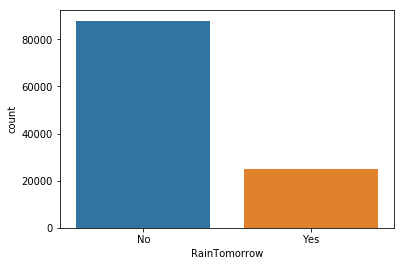

In [20]:
sns.countplot(data=weather1, x='RainTomorrow')

In [21]:
weather1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112925 entries, 19734 to 137494
Data columns (total 17 columns):
MinTemp          112925 non-null float64
MaxTemp          112925 non-null float64
Rainfall         112925 non-null float64
WindGustDir      112925 non-null object
WindGustSpeed    112925 non-null float64
WindDir9am       112925 non-null object
WindDir3pm       112925 non-null object
WindSpeed9am     112925 non-null float64
WindSpeed3pm     112925 non-null float64
Humidity9am      112925 non-null float64
Humidity3pm      112925 non-null float64
Pressure9am      112925 non-null float64
Pressure3pm      112925 non-null float64
Temp9am          112925 non-null float64
Temp3pm          112925 non-null float64
RainToday        112925 non-null object
RainTomorrow     112925 non-null object
dtypes: float64(12), object(5)
memory usage: 20.5+ MB


In [22]:
# Check correlation between all the columns
weather1.corr()

MinTemp   MaxTemp  Rainfall  WindGustSpeed  WindSpeed9am  \
MinTemp        1.000000  0.728942  0.103807       0.159176      0.150577   
MaxTemp        0.728942  1.000000 -0.076825       0.056742     -0.006114   
Rainfall       0.103807 -0.076825  1.000000       0.130388      0.085376   
WindGustSpeed  0.159176  0.056742  0.130388       1.000000      0.589735   
WindSpeed9am   0.150577 -0.006114  0.085376       0.589735      1.000000   
...                 ...       ...       ...            ...           ...   
Humidity3pm    0.026733 -0.497679  0.259652      -0.020903     -0.017875   
Pressure9am   -0.433645 -0.312597 -0.167595      -0.445046     -0.201550   
Pressure3pm   -0.448298 -0.411360 -0.126520      -0.399751     -0.150433   
Temp9am        0.898785  0.884925  0.007418       0.124733      0.089493   
Temp3pm        0.704477  0.984357 -0.080376       0.018325     -0.019280   

               WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
MinTemp            0.146078    -0.218312     0.026733    -0.433645   
MaxTemp            0.013976    -0.517188    -0.497679    -0.312597   
Rainfall           0.060288     0.238756     0.259652    -0.167595   
WindGustSpeed      0.679223    -0.183729    -0.020903    -0.445046   
WindSpeed9am       0.499372    -0.221500    -0.017875    -0.201550   
...                     ...          ...          ...          ...   
Humidity3pm        0.053916     0.684373     1.000000    -0.035468   
Pressure9am       -0.284036     0.115345    -0.035468     1.000000   
Pressure3pm       -0.244390     0.168052     0.046073     0.960248   
Temp9am            0.126778    -0.464487    -0.202107    -0.400133   
Temp3pm           -0.011471    -0.510028    -0.547120    -0.270662   

               Pressure3pm   Temp9am   Temp3pm  
MinTemp          -0.448298  0.898785  0.704477  
MaxTemp          -0.411360  0.884925  0.984357  
Rainfall         -0.126520  0.007418 -0.080376  
WindGustSpeed    -0.399751  0.124733  0.018325  
WindSpeed9am     -0.150433  0.089493 -0.019280  
...                    ...       ...       ...  
Humidity3pm       0.046073 -0.202107 -0.547120  
Pressure9am       0.960248 -0.400133 -0.270662  
Pressure3pm       1.000000 -0.453075 -0.378574  
Temp9am          -0.453075  1.000000  0.859910  
Temp3pm          -0.378574  0.859910  1.000000  

[12 rows x 12 columns]

In [23]:
# Create a Correlation Matrix.
x,ax=plt.subplots(1,figsize=(20,10))
sns.heatmap(weather1.corr(),annot=True,cmap='BuPu',linewidth=0.3)

In [24]:
# Lets also look at the distribution of weather1 with histogram

fig, at= plt.subplots(figsize=(20,12))
hist = weather1.hist(ax=at)


In [25]:
# We use.map to encode the data.
weather1['RainToday']=weather1['RainToday'].map({'No':0 ,'Yes':1})
weather1['RainTomorrow']=weather1['RainTomorrow'].map({'No':0 ,'Yes':1})
weather1.head(40)


MinTemp  MaxTemp  Rainfall WindGustDir  WindGustSpeed WindDir9am  \
19734      21.4     27.4       1.8          NE           19.0          S   
94316      11.9     18.1       0.0         SSE           46.0        SSE   
105258      9.3     16.2       0.0         SSW           26.0          S   
73209       7.2     19.2       0.0          SW           28.0        SSW   
34026      10.8     19.0       0.0         WSW           46.0        WNW   
...         ...      ...       ...         ...            ...        ...   
22864      16.5     20.2       0.0           S           35.0          S   
133610     14.4     32.0       0.0          NW           70.0        ENE   
103225      5.9     21.3       0.0           N           46.0          E   
14689       8.2     24.8       0.0           E           30.0          E   
126499     14.0     20.3       0.0         SSW           30.0        SSW   

       WindDir3pm  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  \
19734         ENE          11.0           9.0         84.0         75.0   
94316         SSE          13.0          26.0         57.0         39.0   
105258         SE          15.0           9.0         51.0         39.0   
73209         SSW           6.0          13.0         99.0         58.0   
34026         WSW          13.0          24.0         63.0         39.0   
...           ...           ...           ...          ...          ...   
22864           S          19.0          15.0         51.0         45.0   
133610          E          19.0          15.0         27.0         17.0   
103225          N          17.0          22.0         46.0         20.0   
14689         ENE          20.0          13.0         53.0         33.0   
126499          S          13.0          13.0         64.0         58.0   

        Pressure9am  Pressure3pm  Temp9am  Temp3pm  RainToday  RainTomorrow  
19734        1020.6       1019.8     25.0     26.7          1             0  
94316        1024.3       1024.4     14.1     18.0          0             0  
105258       1024.3       1022.1     12.1     15.2          0             0  
73209        1024.4       1024.5     11.9     18.7          0             0  
34026        1018.3       1015.8     13.0     17.5          0             0  
...             ...          ...      ...      ...        ...           ...  
22864        1026.2       1023.6     18.6     19.3          0             0  
133610       1014.4       1010.3     26.5     31.3          0             0  
103225       1020.0       1014.8     13.1     20.3          0             0  
14689        1025.0       1020.9     16.8     23.7          0             0  
126499       1014.1       1012.4     16.1     19.0          0             0  

[40 rows x 17 columns]

In [26]:
#Detect outliers. Need 2 square brackets for more than 1 features. Outliers are those random dots outside the range.

sns.boxplot(data=weather1[['MinTemp', 'MaxTemp']])

In [27]:
# Remove outliers that may skew the data.
weather1=weather1.drop(weather1[weather1['MinTemp']>29 | (weather1['MinTemp']< 0)].index)
weather1=weather1.drop(weather1[weather1['MaxTemp']>32 ].index)


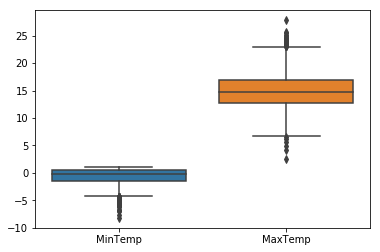

In [28]:
# Show again it has been rmeoved? errors?
sns.boxplot(data=weather1[['MinTemp', 'MaxTemp']])

In [29]:

#Covert direction string to values. Our columns must not have strings! Encode categorical weather1 to int

cat= ['WindGustDir', 'WindDir3pm', 'WindDir9am']
cat

['WindGustDir', 'WindDir3pm', 'WindDir9am']

In [30]:
# One-hot encoding method to encode data.
weather1=pd.get_dummies(weather1, columns=cat)
weather1

MinTemp  MaxTemp  Rainfall  WindGustSpeed  WindSpeed9am  WindSpeed3pm  \
79638     -0.4     13.8       0.4           35.0           4.0          17.0   
59393     -0.2     11.8       0.2           31.0           7.0          19.0   
36025     -1.1      7.8       0.0           15.0           2.0           9.0   
46270      1.0     23.1       0.0           33.0           9.0           9.0   
49068     -2.4     14.4       0.0           41.0           4.0          20.0   
...        ...      ...       ...            ...           ...           ...   
70118     -0.6     15.9       0.0           20.0           7.0          13.0   
75362      0.4     13.7       0.0           48.0           7.0          17.0   
28788      0.0     15.8       0.2           22.0           7.0          11.0   
1558      -0.4     14.1       0.0           19.0           9.0           7.0   
551       -1.0     13.1       0.0           11.0           6.0           9.0   

       Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Temp9am  Temp3pm  \
79638        100.0         62.0       1024.0       1021.1      5.9     12.8   
59393         98.0         72.0       1031.2       1029.6      4.7     10.2   
36025         96.0         88.0       1022.5       1021.2      2.7      6.7   
46270         70.0         26.0       1032.2       1027.1     11.6     22.3   
49068         69.0         47.0       1015.4       1010.8      6.3     12.5   
...            ...          ...          ...          ...      ...      ...   
70118         90.0         29.0       1026.6       1023.4      4.6     15.5   
75362         90.0         56.0       1025.1       1023.7      4.0     13.3   
28788         83.0         47.0       1018.0       1015.6      5.8     15.3   
1558          89.0         51.0       1031.2       1027.8      4.3     13.9   
551           83.0         47.0       1031.8       1030.7      4.1     12.0   

       RainToday  RainTomorrow  WindGustDir_E  WindGustDir_ENE  \
79638          0             1              0                0   
59393          0             0              0                0   
36025          0             0              0                0   
46270          0             0              0                1   
49068          0             1              0                0   
...          ...           ...            ...              ...   
70118          0             0              0                0   
75362          0             0              0                0   
28788          0             1              1                0   
1558           0             0              0                0   
551            0             0              0                0   

       WindGustDir_ESE  WindGustDir_N  WindGustDir_NE  WindGustDir_NNE  \
79638                0              0               0                0   
59393                0              0               0                0   
36025                0              1               0                0   
46270                0              0               0                0   
49068                0              0               0                0   
...                ...            ...             ...              ...   
70118                1              0               0                0   
75362                0              0               1                0   
28788                0              0               0                0   
1558                 0              0               0                0   
551                  1              0               0                0   

       WindGustDir_NNW  WindGustDir_NW  WindGustDir_S  WindGustDir_SE  \
79638                0               0              0               0   
59393                0               0              0               0   
36025                0               0              0               0   
46270                0               0              0               0   
49068                0               1            

In [31]:
weather1['RainTomorrow'].unique()

array([1, 0], dtype=int64)

In [32]:
#  We use X to Predict Y.

x = np.array(weather1.drop(['RainTomorrow'], axis=1))
y = np.array(weather1['RainTomorrow'])


In [33]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [34]:
print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(2177, 61)
(2177,)
(545, 61)
(545,)


In [35]:
# Once the data-set has been split, normalize data using a range of 0 to 1. At the moment, we values go from 0 to 1,000. 

from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()
x_train = sc.fit_transform(x_train)
x_train


array([[0.98837209, 0.48015873, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.96511628, 0.47619048, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.74418605, 0.38492063, 0.00970874, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.97674419, 0.48412698, 0.14563107, ..., 0.        , 0.        ,
        0.        ],
       [0.97674419, 0.52380952, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.89534884, 0.42063492, 0.        , ..., 0.        , 0.        ,
        0.        ]])

===================== MACHINE LEARNING ===============================================















In [36]:
from sklearn.linear_model import LinearRegression

# Define model
lr=LinearRegression()
lr.fit(x_train, y_train)
ypred1=lr.predict(x_test)

print(lr.score(x_train,y_train))
print(lr.score(x_test,y_test))

# Ewww- 30% accuracy. Linear Regression is only used for continuous output not binary classification problems. 

0.2846984471106343
-1744946.7975978127


In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
# Define model
log=LogisticRegression()
log.fit(x_train, y_train)
ypred2=lr.predict(x_test)


In [39]:

print(log.score(x_train,y_train))
print(log.score(x_test,y_test))

# Now that's better!

0.926963711529628
0.9045871559633027


In [40]:
# ANN

In [41]:
x_train1, x_val_and_test, y_train1, y_val_and_test = train_test_split(x, y, test_size=0.3, random_state=42 )

In [42]:
print(x_train1.shape)
print(x_val_and_test.shape)

print(y_train1.shape)
print(y_val_and_test.shape)

(1905, 61)
(817, 61)
(1905,)
(817,)


In [43]:
import keras 
from keras.layers import Dense
from keras.models import Sequential

Using TensorFlow backend.


In [44]:
# We will have 1 output node, as we are predicting yes- it will rain, no it will not rain
model = Sequential([
    Dense(32, activation='relu', init= 'uniform', input_shape=(61,)), # 61 input features
    Dense(32, init= 'uniform', activation='relu'),
    Dense(16, init= 'uniform', activation='relu'),
    Dense(8, init= 'uniform', activation='relu'),
    Dense(1, init= 'uniform', activation='sigmoid'),
])

In [45]:
model.compile(optimizer='Adam',loss ='binary_crossentropy', metrics= ['accuracy'])

In [46]:
# We need to stop it with 'simple early stopping' once the max accuracy has been reached. And to prevent overfitting. Callback will stop training where there is no improvement in validation training
#Overfitting= training loss decreases--> while testing set loss decrease first, then increase

from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint #Save more accurate model each epoch

es= EarlyStopping(monitor= 'val_loss', mode='auto', verbose=1, patience=400)

mc= ModelCheckpoint('best.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [47]:
#If mem problem start batch size with 32, then 64

hist = model.fit(x_train1, y_train1, batch_size=2048, epochs=1000, shuffle=True, validation_data=(x_val_and_test, y_val_and_test), callbacks=[es, mc])

Train on 1905 samples, validate on 817 samples
Epoch 1/1000
1905/1905 [==============================] - 2s 925us/step - loss: 0.6935 - acc: 0.0903 - val_loss: 0.6923 - val_acc: 0.9058

Epoch 00001: val_acc improved from -inf to 0.90575, saving model to best.h5
Epoch 2/1000
1905/1905 [==============================] - 0s 0us/step - loss: 0.6923 - acc: 0.9097 - val_loss: 0.6914 - val_acc: 0.9058

Epoch 00002: val_acc did not improve from 0.90575
Epoch 3/1000
1905/1905 [==============================] - 0s 8us/step - loss: 0.6914 - acc: 0.9097 - val_loss: 0.6904 - val_acc: 0.9058

Epoch 00003: val_acc did not improve from 0.90575
Epoch 4/1000
1905/1905 [==============================] - 0s 8us/step - loss: 0.6904 - acc: 0.9097 - val_loss: 0.6895 - val_acc: 0.9058

Epoch 00004: val_acc did not improve from 0.90575
Epoch 5/1000
1905/1905 [==============================] - 0s 8us/step - loss: 0.6895 - acc: 0.9097 - val_loss: 0.6885 - val_acc: 0.9058

Epoch 00005: val_acc did not improve fro

In [48]:
#Predict on the test-set now
model.predict(x_val_and_test)

array([[0.02372009],
       [0.06703508],
       [0.02475593],
       [0.1240963 ],
       [0.85057414],
       [0.06945619],
       [0.01749902],
       [0.02188106],
       [0.03470475],
       [0.02022263],
       [0.0211624 ],
       [0.05883974],
       [0.01317467],
       [0.10165431],
       [0.02093839],
       [0.03783041],
       [0.01884126],
       [0.01923661],
       [0.04974656],
       [0.02804022],
       [0.07261123],
       [0.8794577 ],
       [0.11171803],
       [0.03807432],
       [0.02740011],
       [0.00832719],
       [0.0659159 ],
       [0.06878098],
       [0.01580119],
       [0.03322585],
       [0.06112931],
       [0.04924847],
       [0.02808955],
       [0.02549756],
       [0.06672835],
       [0.0806382 ],
       [0.01731169],
       [0.03473141],
       [0.01718158],
       [0.08230839],
       [0.01286241],
       [0.0111257 ],
       [0.07067549],
       [0.02683932],
       [0.0629573 ],
       [0.14224401],
       [0.02585362],
       [0.046

In [49]:
# Round it up or down to obtain whole numbers.
Y_pred=model.predict(x_val_and_test)
Y_pred = [ 1 if y>=0.5 else 0 for y in Y_pred]
print(Y_pred)
len(Y_pred)

[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

817

In [50]:
len(x_val_and_test)

817

In [51]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_val_and_test, Y_pred)
print(cm)


# This means that out of 817 observations, 752 were predicted correctly (726+23). 42 cases were predicted NO, when it should have been YES. 26 were predicted YES, when they should have been No. Thus 68 were predicted incorrectly (42+26)
# 8.3% incorrectly predicted



[[721  19]
 [ 57  20]]


In [52]:
# Evaluate the Accuracy for the 'testing- set'
model.evaluate(x_val_and_test,y_val_and_test) 

817/817 [==============================] - 0s 57us/step


[0.2645037134464105, 0.9069767444778685]

In [53]:
# Evaluate the Accuracy for the 'training set'
model.evaluate(x_train1,y_train1)

1905/1905 [==============================] - 0s 57us/step


[0.1910399798958946, 0.9438320209973753]

In [54]:
from sklearn import svm

In [55]:
svm=svm.SVC()
svm.fit(x_train,y_train)
svmPred=svm.predict(x_test)
# All no's? Something is not right...

In [56]:
print(svm.score(x_train,y_train))
print(svm.score(x_test,y_test))

0.9095084979329352
0.9045871559633027


In [57]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, svmPred)
print(cm)

[[493   0]
 [ 52   0]]


Conclusion:

LogisticRegression Accuracy: Training = 92%, Testing = 93%
ANN: Training = 94%, Testing = 92%
SVM: 90%, 93%
                        
To increase both training and testing accuracy, both Logistic Regression and ANN models definitely need more refinement through removal of other irrelevant input features. Both algorithms seem to yield a very similar accuracy rate. 

